In [7]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/crashdata.csv")
print('Columns:')
print(list(df.columns))

# merge similar severity levels and remove 'suspected' rows
df.loc[df["Injuryseverity"]=="Suspected Minor Injury", "Injuryseverity"] = "Possible Injury"
df = df[~df["Injuryseverity"].isin(['Suspected Minor Injury', 'Suspected Serious Injury'])]

# convert date column to datetime
df["DateTime"] = pd.to_datetime(df["DateTime"])
df["DateTime"] = df[["DateTime"]]-pd.Timedelta(hours=7)
df["hour"] = df["DateTime"].dt.hour
df["dayofweek"] = df["DateTime"].dt.dayofweek

df.head()

Columns:
['X', 'Y', 'OBJECTID', 'Incidentid', 'DateTime', 'Year', 'StreetName', 'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries', 'Totalfatalities', 'Injuryseverity', 'Collisionmanner', 'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One', 'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One', 'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two', 'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two', 'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude', 'Longitude']


,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude,hour,dayofweek
0,-111.926299,33.422027,1,2584487,2012-01-09 22:55:00+00:00,2012,Rural Rd,University Dr,0.000,Not Junction Related,...,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.422027,-111.926299,22,0
1,-111.909513,33.434986,2,2584442,2012-01-10 07:55:00+00:00,2012,Mcclintock Dr,State Route 202 Exit 8 A-Ramp,-533.808,Intersection Related Non Interchange,...,Female,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.434986,-111.909513,7,1
2,-111.961282,33.381066,3,2589844,2012-01-10 08:43:00+00:00,2012,Priest Dr,Darrow Dr,170.016,Not Junction Related,...,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.381066,-111.961282,8,1
3,-111.892579,33.378452,4,2579417,2012-01-10 09:04:00+00:00,2012,Baseline Rd,Price Rd,-24.816,Intersection Related Interchange,...,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378452,-111.892579,9,1
4,-111.894042,33.392986,5,2584480,2012-01-10 11:23:00+00:00,2012,Southern Ave,Price Rd,-617.760,Not Junction Related,...,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.392986,-111.894042,11,1


In [26]:
print('Accident severity count')
pd.DataFrame({a: b for a, b in zip(*np.unique(df["Injuryseverity"], return_counts=1))}, index=['count'])

Injury severity count


,Fatal,Incapacitating Injury,No Injury,Non Incapacitating Injury,Possible Injury
count,99,559,27473,4411,7251


Accident severity


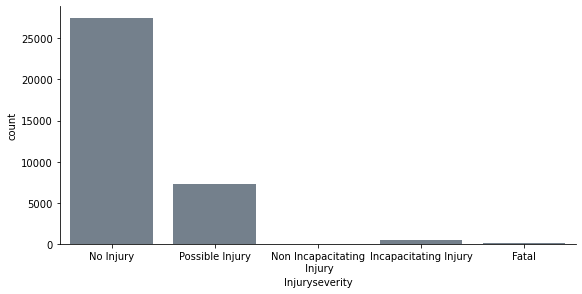

In [33]:
print("Accident severity")
ax = sb.catplot(x="Injuryseverity", kind="count", data=df[["Injuryseverity"]], color="slategray", aspect=2, height=4,
                order=['No Injury', 'Possible Injury', 'Non Incapacitating\n Injury', 'Incapacitating Injury', 'Fatal',])
plt.show()

Accident at time of day and day of week


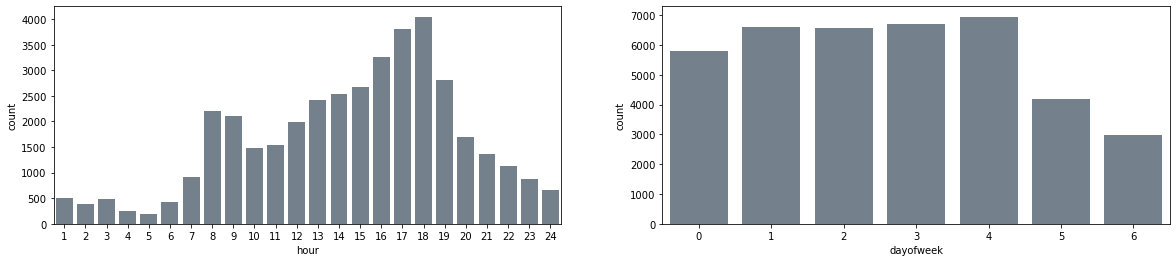

In [35]:
print('Accident at time of day and day of week')
sb.set_palette("Set1")
f, axs = plt.subplots(1, 2, figsize=(20, 4))
sb.countplot(x="hour", data=df[["hour"]]+1, color="slategray", ax=axs[0])
sb.countplot(x="dayofweek", data=df[["dayofweek"]], color="slategray", ax=axs[1])
plt.show()

In [38]:
print("consolidate similar variables")
df.loc[df["JunctionRelation"].isin(
    ['Intersection 201', 'Intersection 4 Way 202', 'Intersection Interchange', 'Intersection Non Interchange', 
     'Intersection Other 204', 'Intersection Related 206', 'Intersection Related Interchange', 'Intersection Related Non Interchange',
     'Intersection T Inter 203', '117', '16', '201', '202', '203', '204', '205', '206', '255', '97']), "JunctionRelation"] = "Intersection"
df.loc[df["JunctionRelation"].isin(
    ['Unknown', 'Unknown Non Interchange']), "JunctionRelation"] = "Unknown"
df.loc[df["JunctionRelation"].isin(
    ['Not Junction Related']), "JunctionRelation"] = "Non intersection"
df.loc[~df["JunctionRelation"].isin(
    ['Not Junction Related', 'Intersection', 'Unknown', 'Unknown Non Interchange']), "JunctionRelation"] = "Non intersection"

df.loc[df["Unitaction_One"].isin(
    ['Making Left Turn', 'Making Right Turn', 'Making U Turn']), "Unitaction_One"] = "Making a Turn"
df.loc[df["Unitaction_Two"].isin(
    ['Making Left Turn', 'Making Right Turn', 'Making U Turn']), "Unitaction_Two"] = "Making a Turn"

print(df.groupby('JunctionRelation')['OBJECTID'].nunique())

consolidate similar variables
JunctionRelation
Intersection        22483
Non intersection    17076
Unknown               234
Name: OBJECTID, dtype: int64


statistics of variables


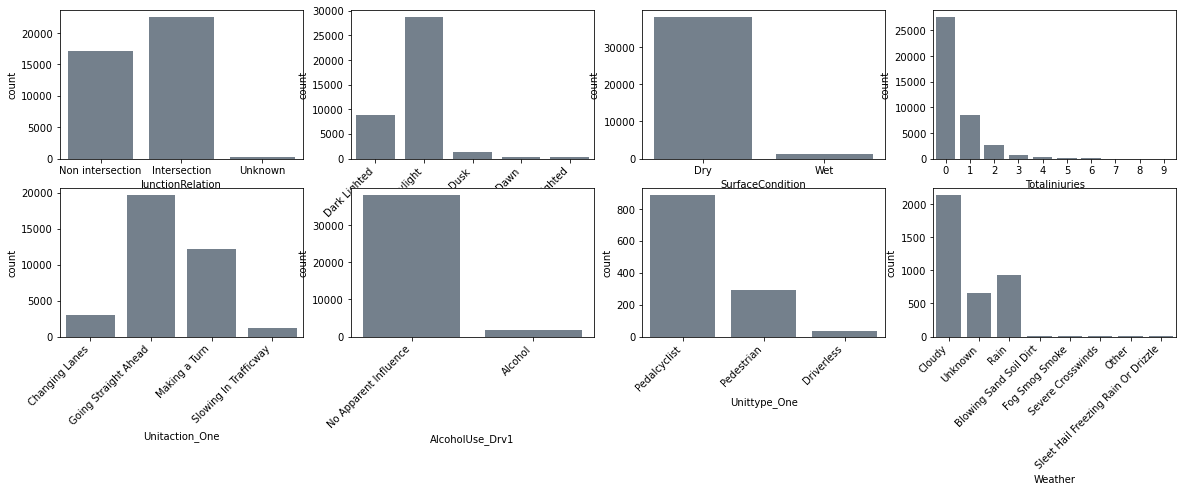

In [39]:
print("statistics of variables")
sb.set_palette("Set1")
f, axs = plt.subplots(2, 4, figsize=(20, 6))
sb.countplot(x="JunctionRelation", data=df[["JunctionRelation"]], color="slategray", ax=axs[0][0])
sb.countplot(x="Lightcondition", data=df.loc[df["Lightcondition"].isin(['Daylight', 'Dark Lighted', 'Dark Not Lighted', 'Dawn', 'Dusk'])], color="slategray", ax=axs[0][1])
axs[0][1].set_xticklabels(axs[0][1].get_xticklabels(), rotation=45, horizontalalignment='right')
sb.countplot(x="SurfaceCondition", data=df.loc[df["SurfaceCondition"].isin(['Dry', 'Wet'])], color="slategray", ax=axs[0][2])
sb.countplot(x="Totalinjuries", data=df[["Totalinjuries"]], color="slategray", ax=axs[0][3])

sb.countplot(x="Unitaction_One", data=df.loc[df["Unitaction_One"].isin(["Making a Turn", "Changing Lanes", "Going Straight Ahead", "Slowing In Trafficway"])], color="slategray", ax=axs[1][0])
axs[1][0].set_xticklabels(axs[1][0].get_xticklabels(), rotation=45, horizontalalignment='right')

sb.countplot(x="AlcoholUse_Drv1", data=df[["AlcoholUse_Drv1"]], color="slategray", ax=axs[1][1])
axs[1][1].set_xticklabels(axs[1][1].get_xticklabels(), rotation=45, horizontalalignment='right')

sb.countplot(x="Unittype_One", data=df.loc[~df["Unittype_One"].isin(['Driver'])], color="slategray", ax=axs[1][2])
axs[1][2].set_xticklabels(axs[1][2].get_xticklabels(), rotation=45, horizontalalignment='right')
sb.countplot(x="Weather", data=df.loc[~df["Weather"].isin(['Clear'])], color="slategray", ax=axs[1][3])
axs[1][3].set_xticklabels(axs[1][3].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

['Unsafe Lane Change', 'Speed To Fast For Conditions', 'Inattention Distraction', 'Other', 'Unknown', 'Made Improper Turn', 'Failed To Keep In Proper Lane', 'Disregarded Traffic Signal', 'No Improper Action', 'Exceeded Lawful Speed', 'Failed To Yield Right Of Way', 'Drove Rode In Opposing Traffic Lane', 'Followed Too Closely', 'Did Not Use Crosswalk', 'Other Unsafe Passing', 'Knowingly Operated With Faulty Missing Equipment', 'Disregarded Pavement Markings', 'Electronic Communications Device', nan, 'Ran Stop Sign', 'Passed In No Passing Zone', 'Walked On Wrong Side Of Road', 'Required Motorcycle Safety Equipment Not Used', '108', '109', 'Drove Left Of Center Line', '49', 'Aggressive Driving', 'Wrong Way Driving']


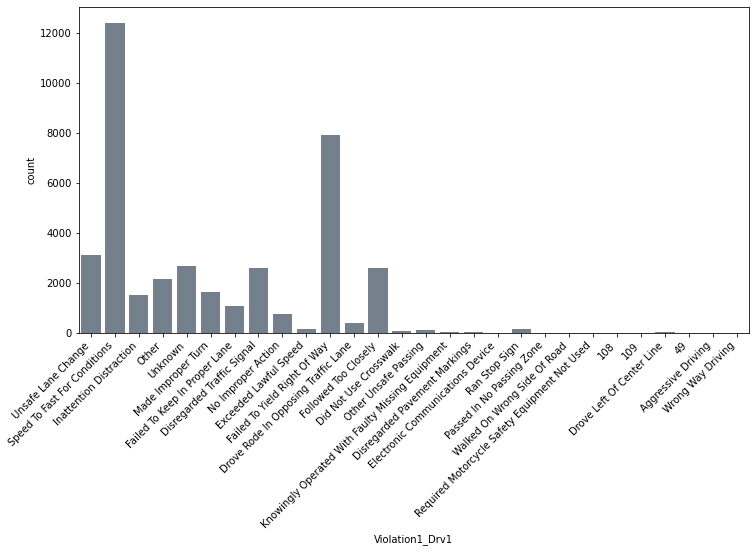

In [41]:
print(list(df["Violation1_Drv1"].unique()))
fig, ax = plt.subplots(figsize=(12, 6))
sb.countplot(x="Violation1_Drv1", data=df[["Violation1_Drv1"]], color="slategray", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

['ANGLE (Front To Side)(Other Than Left Turn)', 'Rear End', 'Sideswipe Same Direction', 'Single Vehicle', 'Left Turn', 'Sideswipe Opposite Direction', 'Other', 'Unknown', 'Rear To Side', 'Head On', 'Rear To Rear', '10', 'Angle - Other Than Left Turn 2', 'U Turn']


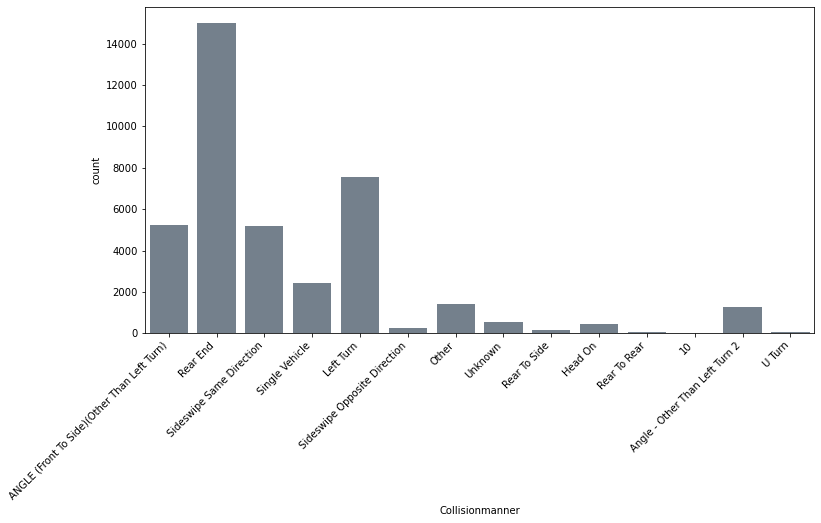

In [42]:
print(list(df["Collisionmanner"].unique()))
fig, ax = plt.subplots(figsize=(12, 6))
sb.countplot(x="Collisionmanner", data=df[["Collisionmanner"]], color="slategray", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

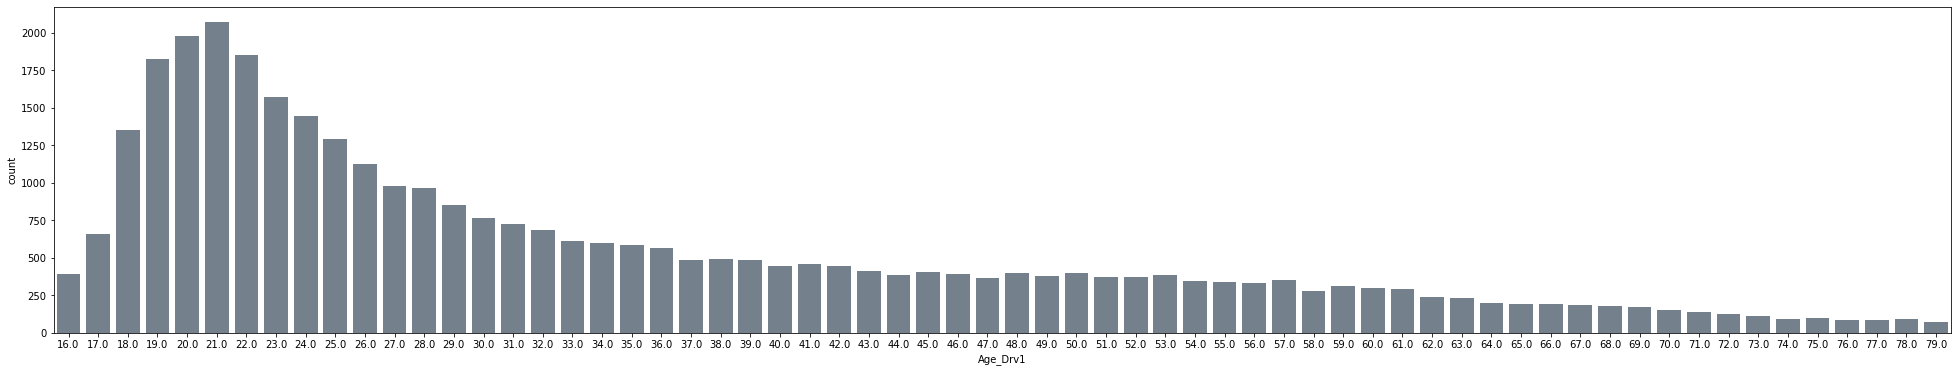

In [43]:
fig, ax = plt.subplots(figsize=(34, 6))
sb.countplot(x="Age_Drv1", data=df.loc[(df["Age_Drv1"]<80) & (df["Age_Drv1"]>15)], color="slategray", ax=ax)
plt.show()